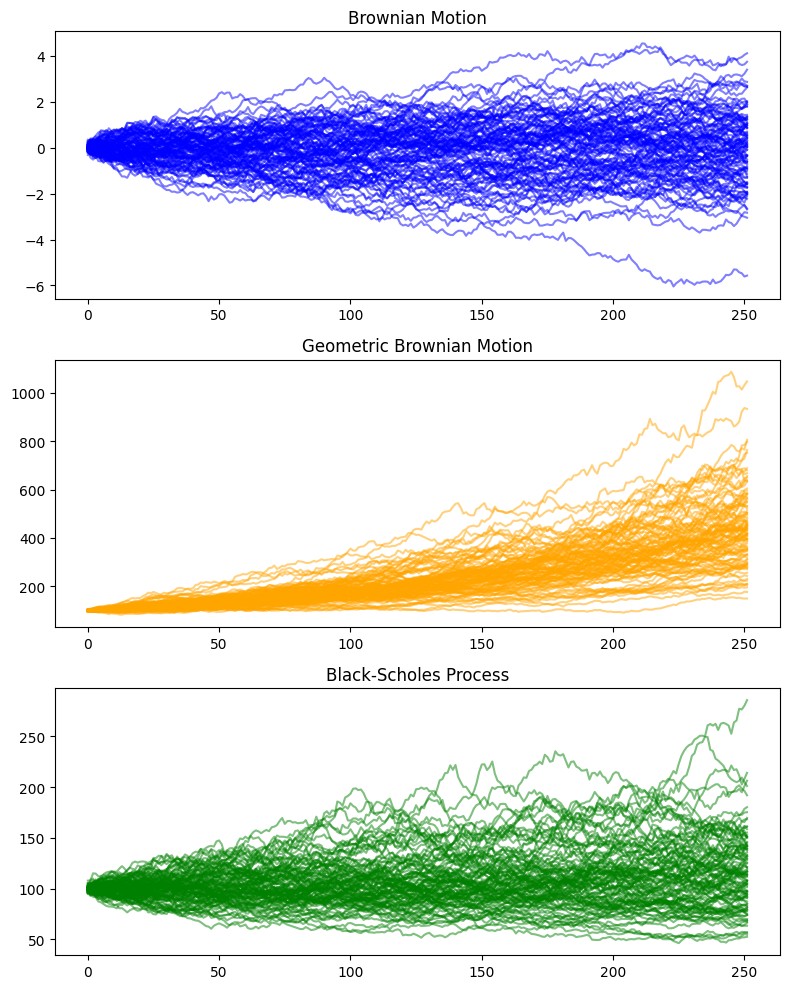

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# シミュレーションのパラメータ
np.random.seed(42)
T = 3.0  # 期間（1年）
N = 252  # 取引日数（1年 = 252日）
dt = T / N  # タイムステップ
mu = 0.5  # ドリフト（期待リターン）
sigma = 0.2  # ボラティリティ
r = 0.05  # リスクフリーレート
S0 = 100  # 初期価格
simulations = 100  # シミュレーション回数

def brownian_motion():
    return np.array([np.random.normal(0, np.sqrt(dt), N).cumsum() for _ in range(simulations)])

def geometric_brownian_motion():
    return np.array([S0 * np.exp((mu - 0.5 * sigma**2) * np.linspace(0, T, N) + sigma * np.random.normal(0, np.sqrt(dt), N).cumsum()) for _ in range(simulations)])

def black_scholes_process():
    return np.array([S0 * np.exp((r - 0.5 * sigma**2) * np.linspace(0, T, N) + sigma * np.random.normal(0, np.sqrt(dt), N).cumsum()) for _ in range(simulations)])

# 各過程のシミュレーション
bm = brownian_motion()
gbm = geometric_brownian_motion()
bs = black_scholes_process()

# 可視化
fig, ax = plt.subplots(3, 1, figsize=(8, 10))
for i in range(simulations):
    ax[0].plot(bm[i], alpha=0.5, color='blue')
ax[0].set_title("Brownian Motion")

for i in range(simulations):
    ax[1].plot(gbm[i], alpha=0.5, color='orange')
ax[1].set_title("Geometric Brownian Motion")

for i in range(simulations):
    ax[2].plot(bs[i], alpha=0.5, color='green')
ax[2].set_title("Black-Scholes Process")

plt.tight_layout()
plt.show()


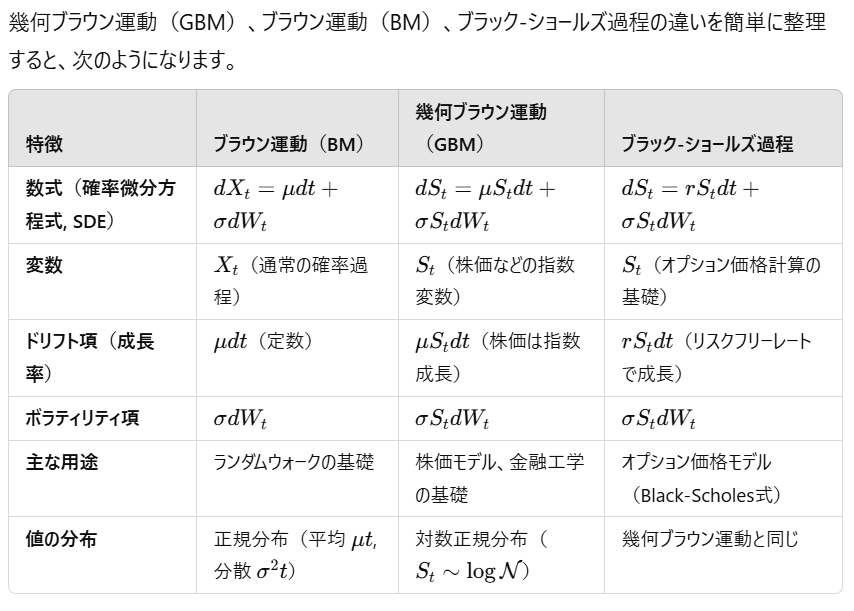

# ブラウン運動 (Brownian Motion)

ブラウン運動は、ランダムな動きのモデルで、物理学や金融における基本的な確率過程の一つです。

特徴
- 確率過程: $dB_t = \epsilon(t) dt$
  - $B_t$: 時刻$t$におけるブラウン運動
  - $\epsilon(t)$: ホワイトノイズ（平均0、分散1）

連続的なランダムウォークを表す。
ドリフト（$\mu$）やボラティリティ（$\sigma$）は含まれない。
価格の変動は無限に小さな時間単位で無限回のランダムな動きが重なることで発生します。

# 幾何ブラウン運動 (Geometric Brownian Motion, GBM)

幾何ブラウン運動は、株価や資産価格のモデル化に広く使われる確率過程です。特に金融工学やオプション価格付けにおいて重要です。

特徴
確率過程: $dS_t = \mu S_t dt + \sigma S_t dB_t$

- $S_t$: 時刻$t$における株価（または資産価格）
- $\mu$: ドリフト（平均成長率）
- $\sigma$: ボラティリティ（変動率）
- $dB_t$: 標準ブラウン運動の変動項

幾何ブラウン運動は、資産価格がポジティブであり続ける特性を持っています。

対数正規分布に従い、価格の対数が正規分布に従う性質があります。

# ブラックショールズ過程 (Black-Scholes Process)
ブラックショールズ過程は、オプション価格をモデル化するために用いられる確率過程です。幾何ブラウン運動を基にしており、特に株式オプションの価格決定理論で有名です。

特徴
確率過程: 
$
dS_t = \mu S_t dt + \sigma S_t dB_t
$

ブラックショールズ過程も、幾何ブラウン運動を使用しています。
株価の変動は、リスク中立測度に基づいています。
通常、リスク中立測度では、無リスク金利$r$がドリフト項$\mu$の代わりに使われます。式は次のようになります。

$
dS_t = r S_t dt + \sigma S_t dB_t
$

オプション価格モデル: ブラックショールズ方程式は、以下のようにオプション価格$C$を求める式で表されます。

- $C = S_0 N(d_1) - K e^{-rT} N(d_2)$
- $d_1 = \frac{\ln(S_0 / K) + (r + \frac{\sigma^2}{2}) T}{\sigma \sqrt{T}}$
- $d_2 = d_1 - \sigma \sqrt{T}$